# Klasifikasi 2800 Data Audio Torronto

Nama : Qoid Rif'at

NIM : 210411100160

Kelas : Proyek Sains Data (A)

In [ ]:
pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/psd a/Dataset/TESS

/content/drive/MyDrive/psd a/Dataset/TESS


In [ ]:
# Import Library
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode

In [ ]:
folders=['YAF_sad','YAF_pleasant_surprised','YAF_neutral',
         'YAF_happy','YAF_fear','YAF_disgust','YAF_angry',
         'OAF_Sad','OAF_Pleasant_surprise','OAF_neutral',
         'OAF_happy','OAF_Fear','OAF_disgust',
         'OAF_angry',
         ]

In [ ]:
def calculate_statistics(audio_path):
    y, sr = librosa.load(audio_path)

    # UNTUK MENGHITUNG NILAI STATISTIKA
    mean = np.mean(y)
    std_dev = np.std(y)
    max_value = np.max(y)
    min_value = np.min(y)
    median = np.median(y)
    skewness = skew(y)  # Calculate skewness
    kurt = kurtosis(y)  # Calculate kurtosis
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    mode_value, _ = mode(y)  # Calculate mode
    iqr = q3 - q1

    # UNTUK MENGHITUNG NILAI ZCR
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    zcr_median = np.median(librosa.feature.zero_crossing_rate(y=y))
    zcr_std_dev = np.std(librosa.feature.zero_crossing_rate(y=y))
    zcr_kurtosis = kurtosis(librosa.feature.zero_crossing_rate(y=y)[0])
    zcr_skew = skew(librosa.feature.zero_crossing_rate(y=y)[0])

    # UNTUK MENGHITUNG NILAI RMSE
    rmse = np.sum(y**2) / len(y)
    rmse_median = np.median(y**2)
    rmse_std_dev = np.std(y**2)
    rmse_kurtosis = kurtosis(y**2)
    rmse_skew = skew(y**2)

    return [zcr_mean, zcr_median, zcr_std_dev, zcr_kurtosis, zcr_skew, rmse, rmse_median, rmse_std_dev, rmse_kurtosis, rmse_skew]


In [ ]:
features =[]

In [ ]:
for folder in folders:
    folder_path = f'{folder}'
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            audio_path = os.path.join(folder_path, filename)
            statistics = calculate_statistics(audio_path)
            features.append([folder, filename] + statistics)

In [ ]:
# Membuat DataFrame dari data
columns =  ['Label', 'File'] + ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
df = pd.DataFrame(features, columns=columns)
df

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_bite_sad.wav,0.118958,0.028320,0.195816,4.225416,2.337965,0.000546,0.000059,0.001320,37.525358,5.243677
1,YAF_sad,YAF_gaze_sad.wav,0.158856,0.039795,0.238732,1.202230,1.678444,0.001550,0.000226,0.003319,21.843042,4.106666
2,YAF_sad,YAF_pad_sad.wav,0.115845,0.035400,0.203942,4.987188,2.520429,0.001959,0.000417,0.004129,16.408426,3.737079
3,YAF_sad,YAF_keen_sad.wav,0.122070,0.041748,0.194403,3.942952,2.267232,0.002499,0.000411,0.005410,174.138543,7.417377
4,YAF_sad,YAF_phone_sad.wav,0.133601,0.039307,0.216806,3.185970,2.128976,0.001083,0.000261,0.002189,22.959138,4.168934
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,OAF_angry,OAF_sail_angry.wav,0.127665,0.054199,0.145001,1.149386,1.636191,0.002693,0.000210,0.006300,22.061996,4.102686
2796,OAF_angry,OAF_raid_angry.wav,0.083381,0.056885,0.098970,6.916934,2.785398,0.001804,0.000241,0.003849,25.869769,4.297576
2797,OAF_angry,OAF_pike_angry.wav,0.088937,0.051025,0.121561,5.428576,2.512790,0.001264,0.000051,0.003169,20.387160,4.076597
2798,OAF_angry,OAF_ton_angry.wav,0.094967,0.069824,0.093773,4.376024,2.164041,0.001198,0.000100,0.002881,24.600067,4.341555


In [ ]:
from google.colab import files
df.to_csv('pert4.csv', index=False)
display(df)

files.download('pert4.csv')

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_bite_sad.wav,0.118958,0.028320,0.195816,4.225416,2.337965,0.000546,0.000059,0.001320,37.525358,5.243677
1,YAF_sad,YAF_gaze_sad.wav,0.158856,0.039795,0.238732,1.202230,1.678444,0.001550,0.000226,0.003319,21.843042,4.106666
2,YAF_sad,YAF_pad_sad.wav,0.115845,0.035400,0.203942,4.987188,2.520429,0.001959,0.000417,0.004129,16.408426,3.737079
3,YAF_sad,YAF_keen_sad.wav,0.122070,0.041748,0.194403,3.942952,2.267232,0.002499,0.000411,0.005410,174.138543,7.417377
4,YAF_sad,YAF_phone_sad.wav,0.133601,0.039307,0.216806,3.185970,2.128976,0.001083,0.000261,0.002189,22.959138,4.168934
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,OAF_angry,OAF_sail_angry.wav,0.127665,0.054199,0.145001,1.149386,1.636191,0.002693,0.000210,0.006300,22.061996,4.102686
2796,OAF_angry,OAF_raid_angry.wav,0.083381,0.056885,0.098970,6.916934,2.785398,0.001804,0.000241,0.003849,25.869769,4.297576
2797,OAF_angry,OAF_pike_angry.wav,0.088937,0.051025,0.121561,5.428576,2.512790,0.001264,0.000051,0.003169,20.387160,4.076597
2798,OAF_angry,OAF_ton_angry.wav,0.094967,0.069824,0.093773,4.376024,2.164041,0.001198,0.000100,0.002881,24.600067,4.341555


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
**PRE-PROCESSING NORMALISASI dengan Z-SCORE**

---


In [ ]:
from sklearn.preprocessing import StandardScaler
# Baca file CSV
dn = pd.read_csv("pert4.csv")
# Tentukan kolom yang akan distandarisasi
kolom = ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
# Inisialisasi StandardScaler
scaler = StandardScaler()
# Lakukan standarisasi pada kolom yang telah ditentukan
dn[kolom] = scaler.fit_transform(dn[kolom])
# Simpan DataFrame yang telah distandarisasi ke dalam file CSV baru
dn.to_csv("pert4_normalisasi.csv", index=False)

In [ ]:
norm=pd.read_csv('pert4_normalisasi.csv')
norm

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_bite_sad.wav,-0.500089,-1.202683,0.315458,0.702208,0.748734,-0.540576,-0.581113,-0.530686,-0.171376,-0.007936
1,YAF_sad,YAF_gaze_sad.wav,0.241102,-0.849802,1.227322,-0.811860,-0.590124,-0.167537,0.135447,-0.263654,-0.562050,-0.594581
2,YAF_sad,YAF_pad_sad.wav,-0.557915,-0.984948,0.488107,1.083717,1.119144,-0.015562,0.956218,-0.155357,-0.697436,-0.785270
3,YAF_sad,YAF_keen_sad.wav,-0.442262,-0.789737,0.285436,0.560745,0.605144,0.185151,0.928323,0.015731,3.231903,1.113593
4,YAF_sad,YAF_phone_sad.wav,-0.228058,-0.864818,0.761444,0.181634,0.324478,-0.341058,0.287598,-0.414542,-0.534246,-0.562453
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,OAF_angry,OAF_sail_angry.wav,-0.338325,-0.406822,-0.764232,-0.838325,-0.675899,0.257439,0.068219,0.134583,-0.556595,-0.596634
2796,OAF_angry,OAF_raid_angry.wav,-1.160992,-0.324233,-1.742273,2.050170,1.657043,-0.073136,0.199273,-0.192804,-0.461737,-0.496080
2797,OAF_angry,OAF_pike_angry.wav,-1.057783,-0.504428,-1.262266,1.304772,1.103636,-0.273694,-0.612549,-0.283596,-0.598319,-0.610095
2798,OAF_angry,OAF_ton_angry.wav,-0.945763,0.073698,-1.852685,0.777635,0.395661,-0.298043,-0.405012,-0.322074,-0.493368,-0.473389


In [ ]:
# Daftar kolom yang ingin dilewati
kolomlabel= ['Label','File']
# Menghitung rata-rata untuk kolom numerik tertentu (mengabaikan kolom yang tidak diinginkan)
rata2= norm.drop(columns=kolomlabel).mean()
#membulatkan hasil komputasi dengan round dengan ketentuan 2 setelah koma, biar ga panjang bestiiiiiii
dibulatkan=rata2.round(2)
# Menampilkan rata-rata
print('--MEAN--')
print(dibulatkan)

--MEAN--
ZCR Mean        -0.0
ZCR Median       0.0
ZCR Std Dev      0.0
ZCR Kurtosis    -0.0
ZCR Skew        -0.0
RMSE             0.0
RMSE Median     -0.0
RMSE Std Dev    -0.0
RMSE Kurtosis    0.0
RMSE Skew        0.0
dtype: float64


In [ ]:
# Daftar kolom yang ingin dilewati
kolomlabel= ['Label','File']
# Menghitung rata-rata untuk kolom numerik tertentu (mengabaikan kolom yang tidak diinginkan)
standv= norm.drop(columns=kolomlabel).std()
#membulatkan hasil komputasi dengan round dengan ketentuan 2 setelah koma, biar ga panjang bestiiiiiii
bulatkan=standv.round(2)
# Menampilkan rata-rata
print('--STANDARD DEVIASI--')
print(bulatkan)

--STANDARD DEVIASI--
ZCR Mean         1.0
ZCR Median       1.0
ZCR Std Dev      1.0
ZCR Kurtosis     1.0
ZCR Skew         1.0
RMSE             1.0
RMSE Median      1.0
RMSE Std Dev     1.0
RMSE Kurtosis    1.0
RMSE Skew        1.0
dtype: float64


---
**NORMALISASI SETELAH SPLIT DATA DAN MENYIMPAN NORMALISASI DALAM BENTUK MODEL**

---

Normalisasi bisa dilakukan sebelum atau sesudah split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pickle import dump

In [ ]:
# Baca data dari file CSV
dataknn= pd.read_csv('pert4.csv')
# Pisahkan fitur (X) dan label (y)
X = dataknn.drop(['Label','File'], axis=1)  # Ganti 'target_column' dengan nama kolom target
y = dataknn['Label']
# split data into train and test sets
X_train,X_test,y_train, y_test= train_test_split(X, y, random_state=1, test_size=0.2)
# define scaler
scaler = StandardScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
# transform the training dataset
X_train_scaled = scaler.transform(X_train)

In [ ]:
import pickle
with open('scaler.pkl', 'rb') as standarisasi:
    loadscal= pickle.load(standarisasi)

In [ ]:
#normalisasi X testing dari hasil normalisasi X train yang disimpan dalam model
X_test_scaled=loadscal.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
K = 30
acc = np.zeros((K-1))

for n in range(1,K,2):
    knn = KNeighborsClassifier(n_neighbors= n, metric = "euclidean").fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc[n-1]= accuracy_score(y_test,y_pred)

print('Akurasi terbaik adalah ', acc.max(), 'dengan nilai k =', acc.argmax()+1)

Akurasi terbaik adalah  0.7339285714285714 dengan nilai k = 15


In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13, metric = "euclidean")
dump(knn, open('modelknn.pkl', 'wb'))

In [ ]:
import pickle
with open('modelknn.pkl', 'rb') as knn:
    loadknn= pickle.load(knn)
loadknn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
y_pred = loadknn.predict(X_test_scaled)
y_pred

array(['OAF_Fear', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_neutral',
       'OAF_happy', 'OAF_neutral', 'YAF_neutral', 'OAF_angry',
       'OAF_disgust', 'OAF_Sad', 'YAF_sad', 'YAF_sad', 'OAF_angry',
       'OAF_angry', 'OAF_Fear', 'OAF_angry', 'OAF_Sad', 'YAF_neutral',
       'OAF_angry', 'YAF_neutral', 'YAF_pleasant_surprised',
       'OAF_neutral', 'OAF_angry', 'YAF_fear', 'OAF_neutral',
       'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_fear',
       'OAF_Pleasant_surprise', 'OAF_happy', 'OAF_neutral', 'OAF_disgust',
       'YAF_neutral', 'YAF_angry', 'YAF_sad', 'YAF_angry', 'OAF_Fear',
       'OAF_disgust', 'YAF_happy', 'OAF_disgust',
       'YAF_pleasant_surprised', 'OAF_happy', 'YAF_neutral', 'YAF_happy',
       'OAF_happy', 'OAF_Pleasant_surprise', 'YAF_happy',
       'YAF_pleasant_surprised', 'OAF_Sad', 'OAF_Sad', 'OAF_disgust',
       'OAF_happy', 'OAF_Sad', 'YAF_fear', 'YAF_disgust', 'OAF_disgust',
       'OAF_angry', 'OAF_Pleasant_surprise', 'YAF_disgust', 'OAF_Sad'

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Akurasi:",accuracy)

Akurasi: 0.7285714285714285


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=8)
X_train_pca= sklearn_pca.fit_transform(X_train_scaled)
type(X_train_pca)

numpy.ndarray

In [ ]:
dump(sklearn_pca, open('PCA8.pkl', 'wb'))

In [ ]:
import pickle
with open('PCA8.pkl', 'rb') as pca:
    loadpca= pickle.load(pca)

X_test_pca=loadpca.transform(X_test_scaled)
X_test_pca.shape

(560, 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_prediksi = classifier.predict(X_test_pca)
y_prediksi

array(['OAF_Fear', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_neutral',
       'OAF_happy', 'OAF_neutral', 'YAF_neutral', 'OAF_angry',
       'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_sad', 'YAF_sad',
       'OAF_angry', 'OAF_angry', 'OAF_happy', 'OAF_angry', 'OAF_Sad',
       'YAF_neutral', 'OAF_angry', 'YAF_neutral',
       'YAF_pleasant_surprised', 'OAF_neutral', 'OAF_angry', 'YAF_fear',
       'OAF_neutral', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_fear',
       'OAF_happy', 'OAF_happy', 'OAF_neutral', 'OAF_disgust',
       'YAF_neutral', 'YAF_angry', 'YAF_sad', 'YAF_angry', 'OAF_Fear',
       'OAF_disgust', 'YAF_happy', 'OAF_disgust', 'YAF_disgust',
       'OAF_happy', 'YAF_neutral', 'YAF_happy', 'OAF_happy',
       'OAF_Pleasant_surprise', 'YAF_happy', 'YAF_pleasant_surprised',
       'OAF_Sad', 'OAF_neutral', 'OAF_disgust', 'OAF_happy', 'OAF_Sad',
       'YAF_fear', 'YAF_disgust', 'OAF_disgust', 'OAF_angry',
       'OAF_disgust', 'YAF_disgust', 'OAF_Sad', 'OAF_disgust',
 

In [ ]:
acc_pca= accuracy_score(y_test,y_prediksi)
print("Akurasi:",acc_pca)
#Akurasi: 0.7375

Akurasi: 0.7375


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


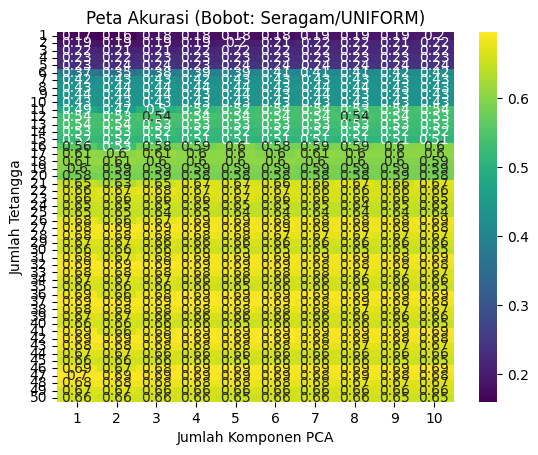

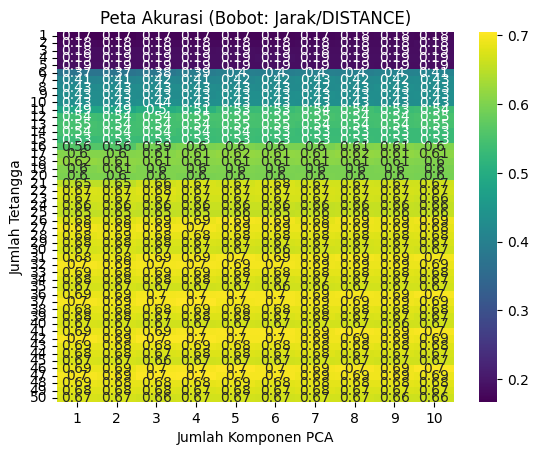

In [ ]:
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Menggunakan data yang sudah Anda miliki
X_latih = X_train_scaled
X_uji = X_test_scaled

# Membuat pipeline
pipeline = Pipeline([
    ('analisa_komponen_utama', sklearnPCA()),
    ('k_terdekat', KNeighborsClassifier(metric='euclidean'))
])

# Menentukan parameter grid
param_grid = {
    'analisa_komponen_utama__n_components': [i for i in range(1, X_latih.shape[1] + 1)],  # Perbaiki rentang berdasarkan jumlah fitur
    'k_terdekat__n_neighbors':list(range(1, 51)),
    'k_terdekat__weights': ['uniform', 'distance']
}

# Melakukan GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_latih, y_train)  # Asumsikan y_latih sudah ada

# Hasil dari GridSearch
hasil_pencarian = grid_search.cv_results_

# Ambil nilai rata-rata skor tes
skor = hasil_pencarian['mean_test_score']

# Membuat heatmap dari skor
matriks_skor = np.array(skor).reshape(len(param_grid['k_terdekat__n_neighbors']),
                                      len(param_grid['analisa_komponen_utama__n_components']),
                                      len(param_grid['k_terdekat__weights']))

# Visualisasi untuk bobot 'seragam'/pendekatan uniform
sns.heatmap(matriks_skor[:, :, 0], annot=True, cmap='viridis',
            xticklabels=param_grid['analisa_komponen_utama__n_components'],
            yticklabels=param_grid['k_terdekat__n_neighbors'])
plt.title('Peta Akurasi (Bobot: Seragam/UNIFORM)')
plt.xlabel('Jumlah Komponen PCA')
plt.ylabel('Jumlah Tetangga')
plt.show()

# Visualisasi untuk bobot 'jarak' / distance
sns.heatmap(matriks_skor[:, :, 1], annot=True, cmap='viridis',
            xticklabels=param_grid['analisa_komponen_utama__n_components'],
            yticklabels=param_grid['k_terdekat__n_neighbors'])
plt.title('Peta Akurasi (Bobot: Jarak/DISTANCE)')
plt.xlabel('Jumlah Komponen PCA')
plt.ylabel('Jumlah Tetangga')
plt.show()
